In [12]:
app = [] #reset app list

Generation 1
[  3.43968794  64.9309862 ]
Generation 2
[  0.71754351  64.9309862 ]
Generation 3
[  0.71754351  64.9309862 ]
Generation 4
[  0.71754351  64.9309862 ]
Generation 5
[  0.71754351  64.9309862 ]
Generation 6
[  0.71754351  64.9309862 ]
Generation 7
[  0.71754351  64.9309862 ]
Generation 8
[  0.71754351  64.9309862 ]
Generation 9
[  0.71754351  64.9309862 ]
Generation 10
[  0.71754351  64.9309862 ]


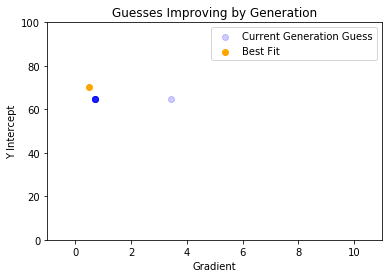

The darker the shade, the more generation guesses are in the same spot
The best solution is [  0.71754351  64.9309862 ]
with error equal to approximately 41.9953987951


In [40]:
### Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable dataset

import random
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy import stats


# load the data
my_data_file = 'temp_data.npy'
data = np.load(my_data_file)

# parameters --------------------------------------------------------------

initial_pop_size = 100

mutation_rate = 0.05 #this is not used as F() is not defined

num_generations = 10 #program terminates after 10 generartions

chromosome_length = 2 #2 genes inside each chromosome. Later used as x,y axis

num_survivors = 50 #1/2 of the pop lives

# functions ---------------------------------------------------------------

def A(): #returns 100 unique chromosomes with 2 genes from a gene_pool of 5000
    
    gene_pool = np.linspace(-1,80,num = 5000) #creates an array with 5000 evenly spaced nums between -1 and 80.
    
    dimensions = (initial_pop_size, chromosome_length) #100(pop size), 2(chromosome length)
    
    return np.random.choice(gene_pool, size=dimensions, replace=False)
    '''randomly returns numbers from the gene_pool,
    returns dimensions amount of ints (size = dimensions)
    no same gene will be returned thanks to replace=False'''


def B(coefficients): #returns approximate error

    #print('coeff:', coefficients)
    k = len(data) #100
    tot = 0
    
    for j in range(k):#loops through 100
        
        y = coefficients[0] * data[j,0] + coefficients[1]
        res = data[j,1] - y
        tot += res**2
    #print('tot/k', tot/k)
    return tot/k
    
   
def C(): #creates the fitlist and assigns a fit value to each chromosome
    fitlist = []
    for x in range(len(current_pop)): #iterates through a range (first 100, then 250)
        fitlist.append(np.array([x,B(current_pop[x])])) #appends the fitness of each chromosome to fitlist

    return np.array(fitlist)


def D():
    
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors//2, replace=False) #returns an array with 25 non-repeated random ints from 0 to 250 (not including 250)
    
    best = np.argmin(fitness_vector[random_selection,1]) #returns index of the minimum value from an axis
    best_index = random_selection[best]
    
    #print('D', current_pop[int(fitness_vector[best_index][0])])
    return current_pop[int(fitness_vector[best_index][0])]    


def E(): #crosses over - returns array with duplicate of survivors (this part of the array should later be mutated in function F())
    duplicate_size = len(new_population) - len(survivors)
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length))
    
    for x in range(chromosome_length): # for each column in the survivor array assign values to duplicate_survivors
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) # duplicate column 4 times
        #print('BEFORE:', duplicate_survivors)
        
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
        #print('AFTER:', duplicate_survivors)

    return duplicate_survivors


'''
Fill in function F with working code that accomplishes the task you described above. Be sure to annotate your code.
'''

def F(array): #mutates either the first or second gene
    
    #print(data)
    
    for chromosome in data: #loops through all chromosomes
        rand = random.randrange(0,100) #returns a random value between 0 and 100 (exclusive) 0-99
        
        if rand < 5: #chooses if the chromosome will be mutated or not
            
            #print(rand)
            #print("-------------------")

            #print('Before Mutation: ',chromosome)
            
            if rand > 2: #mutates the second gene - chromosome[1]
                mutation1 = float(random.randrange(-100,100))
                
                if mutation1 != 0: #this is important because trying to divide 0 by 100 will return an error 
                    mutation1 = mutation1/100
                    chromosome[1] = chromosome[1] + mutation1
                
                #print(mutation1)

            else: #mutates the first gene - chromosome[0]
                
                mutation2 = float(random.randrange(0,10))
                
                chromosome[0] = chromosome[0] + mutation2

            #print('After Mutation: ',chromosome)

    return array

########################################################################

# Start of main program

current_pop = A() #100 unique chromosomes with 2 genes (x,y coordinates?)
#print ('Current Population: \n \n',current_pop, '\n')

new_population = np.zeros((num_survivors * 5, chromosome_length)) #creates empty array with 250 empty chromosomes of length 2
#print('New Population: \n', new_population)

gen = 0

# main loop

xp = []
yp = []

for i in range(num_generations): #loops 10 times
    
    fitness_vector = C() #fitness value is assigned to fitness_vector
    
    survivors = np.zeros((num_survivors, chromosome_length)) #creates empty array with 50 empty chromosomes of length 2
    #print('survivors:\n',survivors)
    #print(len(survivors))
    
    for n in range(len(survivors)): #loops 50 times
        survivors[n] = D() #Turns survivors[n] into D()
        
    new_population[:len(survivors)] = survivors #survivors are assigned to first (empty) part of new_population
    #print(new_population, '\n\n\n')
    
    new_population[len(survivors):] = E() #E() is assigned to second (empty) part of new_population
    #print(new_population)

    new_population = F(new_population) #Currently does NOTHING (should mutate chromosomes)

    current_pop = new_population #updates current population
    
    new_population = np.zeros((num_survivors * 5, chromosome_length)) #resets new_population to an empty array so it can be used again in the beginning of the loop
    
    gen += 1
    
    print('Generation', gen)
    print(current_pop[0])
    
    xp = xp + [current_pop[0][0]]
    yp = yp + [current_pop[0][1]]
    
plt.scatter(xp, yp, color = 'blue', label = 'Current Generation Guess', alpha = 0.2 ) #not exactly the best guess, but eventually this value is chosen, so it will do just fine for presentation purposes
plt.scatter(stats.linregress(data)[0], stats.linregress(data)[1], color = 'orange', label = 'Best Fit')
    
plt.title('Guesses Improving by Generation')
plt.xlabel('Gradient')
plt.ylabel('Y Intercept')
    
plt.legend()
    
pylab.xlim(-1,11)
pylab.ylim(0,100)
    
plt.show()
    
print("The darker the shade, the more generation guesses are in the same spot")
    
fitness_vector = C() #creates a final fitlist with the best values that were found (the smaller the better)

best_solution = current_pop[np.argmin(fitness_vector[:,1])] #assigns the index value of 0 (smallest num) from current_pop to best_solution
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

app.append(best_solution)

#### If you actually want to visualize the guess of every single generation use the cell below

Generation 1
[  2.24064813  58.41728346]


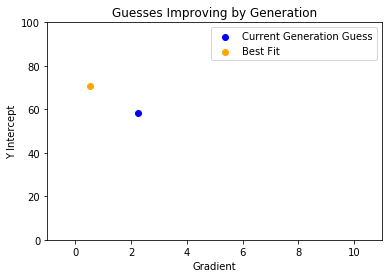

Generation 2
[  0.5555111   79.62732547]


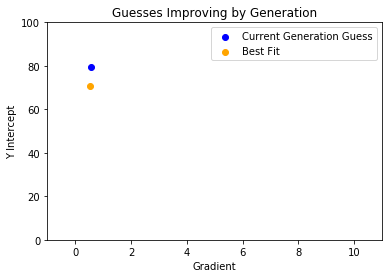

Generation 3
[  0.26385277  74.70154031]


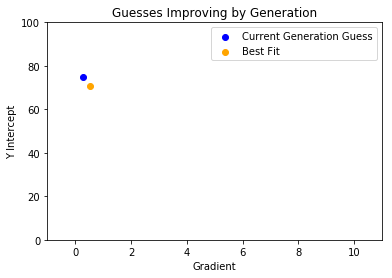

Generation 4
[  0.26385277  74.70154031]


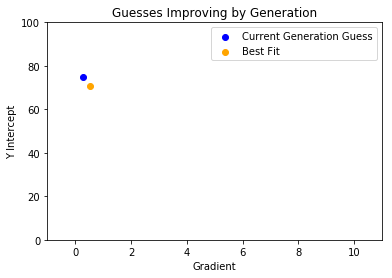

Generation 5
[  0.5555111   70.32666533]


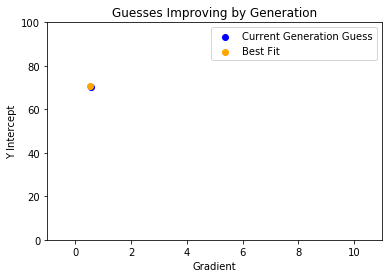

Generation 6
[  0.5555111   70.32666533]


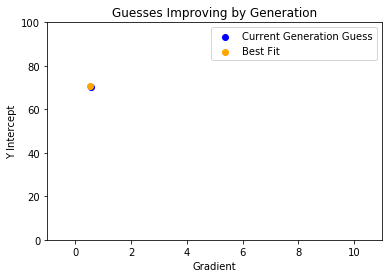

Generation 7
[  0.5555111   70.32666533]


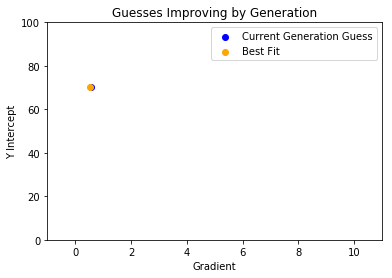

Generation 8
[  0.5555111   70.32666533]


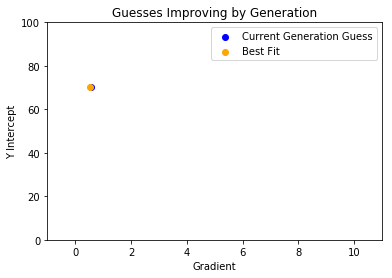

Generation 9
[  0.5555111   70.32666533]


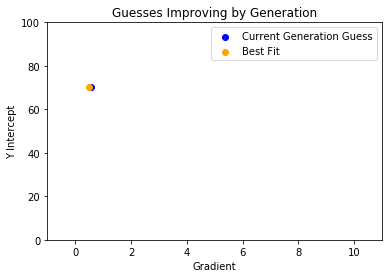

Generation 10
[  0.5555111   70.32666533]


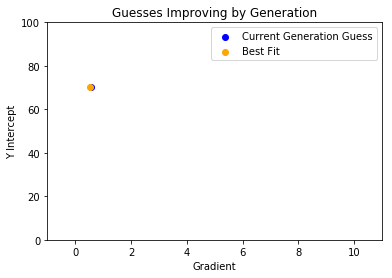

The best solution is [  0.5555111   70.32666533]
with error equal to approximately 28.7999345524


In [39]:
### Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable dataset

import random
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy import stats
# load the data
my_data_file = 'temp_data.npy'
data = np.load(my_data_file)
# parameters --------------------------------------------------------------
initial_pop_size = 100
mutation_rate = 0.05 #this is not used as F() is not defined
num_generations = 10 #program terminates after 10 generartions
chromosome_length = 2 #2 genes inside each chromosome. Later used as x,y axis
num_survivors = 50 #1/2 of the pop lives

########################################################################

# Start of main program

current_pop = A() #100 unique chromosomes with 2 genes (x,y coordinates?)
#print ('Current Population: \n \n',current_pop, '\n')

new_population = np.zeros((num_survivors * 5, chromosome_length)) #creates empty array with 250 empty chromosomes of length 2
#print('New Population: \n', new_population)

gen = 0

# main loop

for i in range(num_generations): #loops 10 times
    
    fitness_vector = C() #fitness value is assigned to fitness_vector
    
    survivors = np.zeros((num_survivors, chromosome_length)) #creates empty array with 50 empty chromosomes of length 2
    #print('survivors:\n',survivors)
    #print(len(survivors))
    
    for n in range(len(survivors)): #loops 50 times
        survivors[n] = D() #Turns survivors[n] into D()
        
    new_population[:len(survivors)] = survivors #survivors are assigned to first (empty) part of new_population
    #print(new_population, '\n\n\n')
    
    new_population[len(survivors):] = E() #E() is assigned to second (empty) part of new_population
    #print(new_population)

    new_population = F(new_population) #Currently does NOTHING (should mutate chromosomes)

    current_pop = new_population #updates current population
    
    new_population = np.zeros((num_survivors * 5, chromosome_length)) #resets new_population to an empty array so it can be used again in the beginning of the loop
    
    gen += 1
    
    print('Generation', gen)
    print(current_pop[0])
    
    plt.scatter(current_pop[0][0], current_pop[0][1], color = 'blue', label = 'Current Generation Guess') #not exactly the best guess, but eventually this value is chosen, so it will do just fine for presentation purposes
    plt.scatter(stats.linregress(data)[0], stats.linregress(data)[1], color = 'orange', label = 'Best Fit')
    
    plt.title('Guesses Improving by Generation')
    plt.xlabel('Gradient')
    plt.ylabel('Y Intercept')

    plt.legend()

    pylab.xlim(-1,11)
    pylab.ylim(0,100)

    plt.show()
     
fitness_vector = C() #creates a final fitlist with the best values that were found (the smaller the better)

best_solution = current_pop[np.argmin(fitness_vector[:,1])] #assigns the index value of 0 (smallest num) from current_pop to best_solution
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

app.append(best_solution)

### 3 . Optional challenges (basic):
Note: for any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

3 . 1 Modify the program to include a visualization of how the error / fitness changes with each subsequent generation. Interpret this however you like, but make sure to include a prose explanation, and to label your visualization well.

I changed the code an made a scatter plot for each generation. In most cases, it is easy to observe how the tenth (last) generation is much closer to the real Best Fit than the first generation. #dataviz #algorithms These two HCs were used appropiately in order to easily visualize the information and come up with the necessary code to plot the information.

Below are the visualizations of the first and last generations. The output of all the generations is available as output of the main code (above).

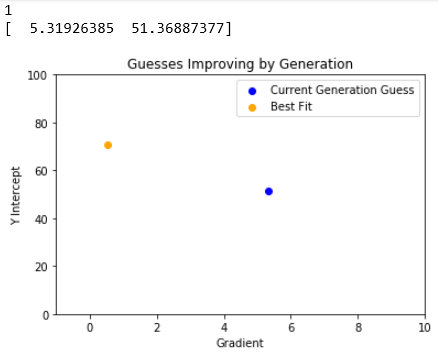

                                             Figure 1. First generation guess. The numbers 
                                             above the figure are the exact guess of the 
                                             generation.

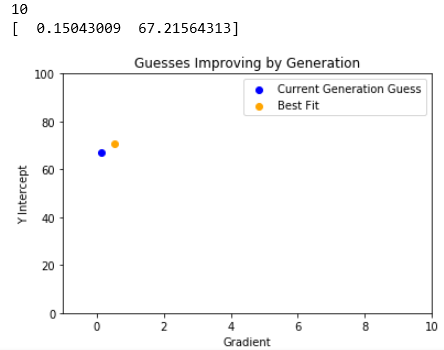

                                             Figure 2. Tenth generation guess.The numbers 
                                             above the figure are the exact guess of the 
                                             generation. This generation is much closer to 
                                             the best fit line than the first generation 
                                             guess. The x and y axis ranges were not changed 
                                             in order to better show how the last generation 
                                             is much closer to the best fit dot than the 
                                             first generation.

#### 3 . 2 Fill in function F with working code that accomplishes the task you described above. Be sure to annotate your code.

My answer is inside the program where F() is defined. If you want to see the output just remove the # in front of each function.

I used #algorithms to come up with a mutation algorithm (That was the most redundant explanation ever).

In [3]:
# scipy regression function to compare with the genetic algorithm's solutions

print(stats.linregress(data)[0:2],'\n')

print(stats.linregress(data)) #print full regression line info

(0.53992593932107447, 70.709972206845848) 

LinregressResult(slope=0.53992593932107447, intercept=70.709972206845848, rvalue=0.85050284307705293, pvalue=4.2472662391043701e-29, stderr=0.033729253546085775)


### 1 . Function descriptions [#algorithms, optimization]: \ For each of the functions A to E, write a few sentences that address the following points. Be sure to also consider the “main program” portion of the code. Explain what this part does and how it connects to the functions below. [<100 words per function]

#### 1 . 1 Describe which aspect of a genetic algorithm the function pertains to.

#### 1 . 2 Provide an overview of how the function accomplishes its task.

#### 1 . 3 Specify the inputs, outputs, and any major data structures involved.

#### Missing function: Function F currently does nothing. Use a process of elimination to determine, then describe, which common element of a genetic algorithm is missing from this program and could become F. Detail why this element of the algorithm is important for finding an optimal solution. Optional: Fill in F with working code that accomplishes this task.



#### Function A 

Returns 100 unique chromosomes with 2 genes from another function called gene_pool with 5000 elements.
This is part of the first step of a genetic algorithm, in which random chromosomes are created and chosen.
The function does not take any inputs, but it does use the np.random.choice() function in order to randomly return chromosomes.
The function works by first creating an array of 5000 evenly spaced numbers between -1 and 80. It then specifies the dimensions of the population (100) and of the chromosomes (2). Finally, it randomly returns numbers from the gene_pool, returns dimensions amount of ints (size = dimensions), and ensures no same gene will be returned thanks to replace=False.

#### Function B

Function B() is used as a measuring parameter. It is used in function C() to determine how fit a chromosome is. It is also used at the end of the program in order to calculate the error of the best guess to the real best fit line.
It is important to the program as it is what allows the genetic algorithm to know what it has to get closer to.
The function loops through 100 elements (the length of the imported temperature data) and takes chromosomes as input. It then merges the two values from the chromosome together allowing it to just use one value to determine the error of a specific guess.

#### Function C

Function C creates a fitlist, tests, and assigns a fit value to each chromosome. It tests each chromosome by comparing how close it is to the error from function B() This corresponds to the second step in Genetic Algorithms.
The function begins by creating an empty list. It then loops through the length of the current population, and it appends the fitness of each chromosome into the previously empty list.
The function does not take any input, but it makes use of the current population parameter.

#### Function D

Function D is the selection step of the Genetic Algorithm. First, it selects 25 random non-repeated integers from 0 to 250 (not including 250). It then returns the fittest chromosome from the randomly chosen array (where the closer the chromosome to the actual regression line the fitter it is).
The function does not take any direct input, but it does make use of num_survivors and the fitness_vector taken from function C().

#### Function E


This function returns an array with a duplicate of survivors that have been crossovered (it is the crossover step of this genetic algorithm). Some of the duplicates could be later be mutated in function F().
The function duplicates each first gene of a chromosome four times and then performs a crossover on the second gene of the chromosome.
The result looks something like:
    
    x1,y1
    x1,y2
    x1,y3
    x1,y4
    
This step is important because it creates the offspring in the genetic algorithm. These chromosomes will later be compared in fitness values.

#### Function F

Function F mutates the current population. This is done by stepping through each individual chromosome and establishing a rate at which a mutation will be made. This allows for both mutated and non-mutated chromosomes to exist. After some chromosomes have been mutated, the genetic algorithm will loop back and a mutated chromosome may have a higher fitness score than other chromosomes. This will lead to a better approximation to the Best Fit line.

### 2 . Overview [#optimization, #algorithms, #regression]

#### 2 . 1 Write a paragraph to explain what the parameters at the top of the script are. By experimenting with varying parameter values, determine what values produce solutions that are closest to the actual solution most efficiently. Why do you think this is? [\~200 words]

initial_pop_size: Increasing the initial_pop_size increases the accuracy of the genetic algorithm. Decreasing has the opposite effect. This happens because as the variable increases, the genetic algorithm can make more guesses, and there will be more guesses closer to the actual line of best fit. If the variable is lower, the genetic algorithm will make less guesses, and so have less points from which to choose from.

mutation_rate: This parameter is not used, but its function would be to determine the likelyhood of each chromosome being mutated or not. As it increases, more chromosomes will be mutated, and it reasonable to expect greater differences in size of each chromosome. This will might result in greater or less accuracy.

num_generations: This parameter sets the amount of generations that will be iterated. Increasing it greatly slows down the execution of the code (specially because I have included plots which take time to graph).
The higher the parameter, the more chances the genetic algorithm will have to run through chromosomes and make crossovers. This is not very useful because by generation 7 most chromosomes are the same.
This parameter would be much more useful to increment if the F() function (mutation) is implemented as it would allow for greater heterogony.

chromosome_length: The chromosome length is the amount of genes that are in each chromosome. This cannot be altered as a regression line only takes two values, the y intercept and the gradient. Modifying this results in errors.

num_survivors: This parameter defines how many chromosomes will be passed on to the next generation.
Decreasing the parameters results in extremely high gradients (20+) for the first generation. This is because the genetic algorithm has much less chromosomes to pick from, which in early generations can be problematic as guesses are still very far off. Increasing it to 100 still yields accurate results.

#### 2 . 2 Write a paragraph that gives an overview of how this program solves the given task, and what the output represents. [\~200 words]

This program is a genetic algorithm that by default iterates 10 times (10 generations) over a loop. It creates an array with random chromosomes, then assigns each chromosome a fitness score. Later, it selects the fittest chromosomes and crosses over some of them. (At this point it could apply mutation but it does not. It then goes back to assigning fitness scores to each chromosome, looping 9 more times. In the end, the first element of the array is selected as the best guess - which is much closer to the initial guess.

The output of the program is the closest guess to the best fit line. This program is not very useful as it uses the best fit line in order to make its final guess better, which means that there is access to the best fit line data. Having access to the best fit line data means that there is no point in making guesses when one could just use the best fit line.

### 3 Optional challenges (basic):

#### Note: for any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

#### 3 . 3 Optimize the code: There are many aspects of the code that could be improved. Choose one part of the code and describe in as much detail as possible a way in which it can be optimized. Then, implement your optimization. Be clear about what you are optimizing for and how your proposal accomplishes this.

The current code returns random guesses that even though they approximate themselves to the actual best fit, can end up miscalculating the temperature by using a line of best fit that is still slightly off. A very simple way to vastly reduce this error is to create an empty list, run the code 20+ times, and each time the code is ran append the best guess of each iteration to the empty list. After this, a new variable is created and the mean of the gradient and y-intercept are calculated and assigned to it. All the data is then plotted on a scatterplot, and the mean of the guesses will be much closer to the line of best fit than most individual guesses.

This solution is effective because it greatly reduces the possible error of each guess, it is scalable (the more guesses the longer it will take to run, but the more accurate it will be), and it is simple to implement.

I used #dataviz and #algorithms to properly visualize the data and write the necessary code.

Note: I had to modify the main body of the code in order to create a new empty list which I later appended each best individual guess to.

Mean of x:  0.6372638164
Mean of y:  67.3349579007


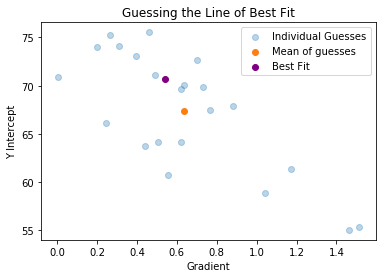

In [42]:
import numpy

#print(app, '\n')

x = []
y = []

for num in app:
    x.append(num[0])
    y.append(num[1])
    
meanx = numpy.mean(x)
meany = numpy.mean(y)

print('Mean of x: ',meanx)
print('Mean of y: ',meany)

plt.scatter(x,y, alpha = 0.3, label = 'Individual Guesses') #genetic algorithm guesses
plt.scatter(meanx,meany, label = 'Mean of guesses') #best fit calculated from mean of genetic algorithms
plt.scatter(stats.linregress(data)[0],stats.linregress(data)[1], color = 'purple', label = 'Best Fit') #real best fit

plt.xlabel('Gradient')
plt.ylabel('Y Intercept')
plt.title('Guessing the Line of Best Fit')

plt.legend()

plt.show()

Below I attached 3 pictures in 3 different code executions that show how my proposal approximates itself to the real best fit much better than most individual guesses. This provides a more reliable line of best fit.

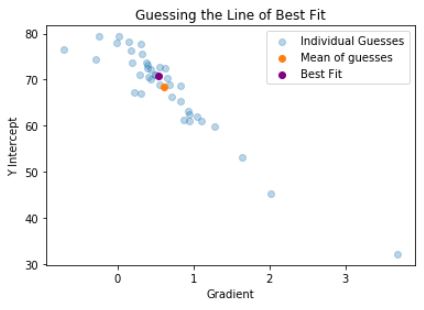

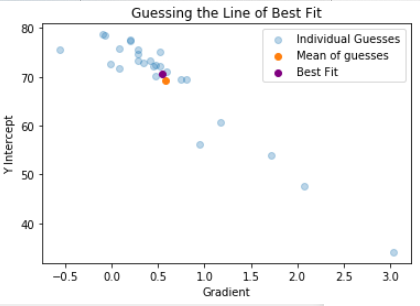

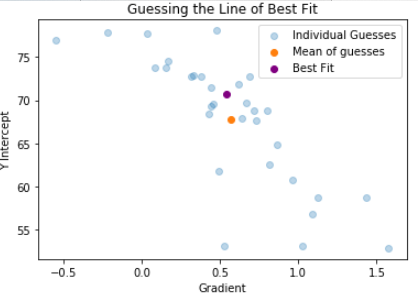

# Notes

## You can ignore this last section, it's just me playing around with functions and doing research. But you might find the two mutation and plotting a mutation cells at the bottom to be interesting, which is how I came up with the mutation algorithm for F().

### np.linspace()

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html

In [5]:
print(np.linspace(2.0, 3.0, num = 5)) #evenly spread nums from 2 to 3. 5 nums in between.

[ 2.    2.25  2.5   2.75  3.  ]


In [6]:
gene_pool = np.linspace(-1,80,num = 5000)
print(type(gene_pool))

<class 'numpy.ndarray'>


### np.random.choice()

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html

In [7]:
x = (np.random.choice(10, size=3)) #returns 3 random ints from 0 to 10 (exclusive) - 0,9

print(x)
print(type(x))

[5 3 0]
<class 'numpy.ndarray'>


##### size : int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

In [8]:
v = np.random.choice(10)
z = np.random.choice(10, size = 5) #size specifies how many nums to return

print(z)
print(v)

[0 1 2 5 2]
0


##### replace : boolean, optional
Whether the sample is with or without replacement

In [9]:
y = np.random.choice(5, size = 5, replace = False) #replace makes sure that no same number can be returned
print(y)

[3 2 0 4 1]


### np.zeros()

In [10]:
z = np.zeros((4, 1)) #empty array of length 4, with each elements 1 long
print(z)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [11]:
m = np.zeros((4, 3)) #empty array of length 4, with each element 3 long
print(m)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


### np.argmin()

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html

In [12]:
arr = np.random.choice(15, size = 10, replace = False)
print(arr)

print(np.argmin(arr)) #returns the index value of the smalles number in the array

[ 7  2 11  9  0  8  6 13  1  5]
4


### Decryption

In [13]:
l =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in range(10): #loops 10 times
    print(l[i])

1
2
3
4
5
6
7
8
9
10


In [14]:
6/2

3.0

In [15]:
6//2

3

In [16]:
7/2

3.5

In [17]:
7//2

3

In [18]:
random_selection = np.random.choice(range(len(fitness_vector)), size = num_survivors//2, replace=False)
print(random_selection)

print(len(random_selection))

#returns an array with 25 non-repeated random ints from 0 to 250 (not including 250)

[  2 231  22   7  14   8  73 143  20 133 166 203 130 235 204 116 221 152
 162  53 202  17 112 114 220]
25


In [19]:
print(range(len(fitness_vector)))

range(0, 250)


In [20]:
print(num_survivors)

50


# * Mutation

In [43]:
import random

ch = [[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1]]

print('Original Chromosomes', ch)

for i in ch:
    
    print(i,'\n------')
    
    rand = random.randrange(0,100)
    print(rand)
    
    if rand < 25:
        print("MUTATE!")
        i[1] = 0
        print(i,'\n------')
        
print('Mutated chromosomes', ch)

Original Chromosomes [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
[1, 1] 
------
39
[1, 1] 
------
88
[1, 1] 
------
39
[1, 1] 
------
3
MUTATE!
[1, 0] 
------
[1, 1] 
------
43
[1, 1] 
------
16
MUTATE!
[1, 0] 
------
[1, 1] 
------
59
[1, 1] 
------
58
[1, 1] 
------
60
[1, 1] 
------
11
MUTATE!
[1, 0] 
------
Mutated chromosomes [[1, 1], [1, 1], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [1, 1], [1, 1], [1, 0]]


# * Plotting a Mutation

Original Chromosomes [[1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1]]


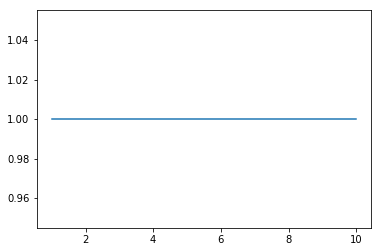

[1, 1] 
------
2
MUTATE!
[1, 2] 
------
[2, 1] 
------
6
MUTATE!
[2, 2] 
------
[3, 1] 
------
44
[4, 1] 
------
39
[5, 1] 
------
86
[6, 1] 
------
73
[7, 1] 
------
94
[8, 1] 
------
17
MUTATE!
[8, 0] 
------
[9, 1] 
------
14
MUTATE!
[9, 0] 
------
[10, 1] 
------
51
Mutated chromosomes [[1, 2], [2, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 0], [9, 0], [10, 1]]


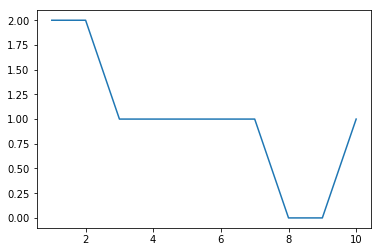

In [72]:
import random

ch = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,1],[8,1],[9,1],[10,1]]

print('Original Chromosomes', ch)

ch1 = []
ch2 = []

for i in ch:
    ch1.append(i[0])
    ch2.append(i[1])

plt.plot(ch1, ch2)
plt.show()

for i in ch:
    
    print(i,'\n------')
    
    rand = random.randrange(0,100)
    print(rand)
    
    if rand < 25:
        print("MUTATE!")
        
        if rand > 12:
            i[1] = 0
        else:
            i[1] = 2
        print(i,'\n------')
        
print('Mutated chromosomes', ch)

x = []
y = []

for i in ch:
    x.append(i[0])
    y.append(i[1])
    
plt.plot(x, y)
plt.show()

In [17]:
f = 2.123
f = str(f)
print(len(f))

5
